In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatText
import matplotlib.patches as patches

### Warm-Up Problems

1. Compute the linear combination $c_1\vec{v_1} + c_2\vec{v_2} + c_3\vec{v_3}$ where $\vec{v_1} = \begin{bmatrix} -3\\ 1\\ 5\end{bmatrix},~\vec{v_2} = \begin{bmatrix} 1\\ 1\\ -1\end{bmatrix}$, and $\vec{v_3} = \begin{bmatrix} 0\\ 0\\ 2\end{bmatrix}$ with $c_1 = -1$, $c_2 =-4$, and $c_3 = 5$.

2. Determine whether the vector $\begin{bmatrix} -4\\ 3\end{bmatrix}$ is a linear combination of the vectors $\vec{v_1} = \begin{bmatrix} 2\\ 8\end{bmatrix}$ and $\vec{v_2} = \begin{bmatrix} -1\\ 1\end{bmatrix}$.

3. What must be true about all vectors which are linear combinations of the vectors $\vec{v_1} = \begin{bmatrix} -3\\ -1\\ 0\end{bmatrix}$ and $\vec{v_2} = \begin{bmatrix} 0\\ 1\\ 0\end{bmatrix}$?

## Day 10: The Span of a Set of Vectors

We've spent our last two meetings focused on *linear combinations* of vectors. As a reminder, a vector $\vec{y}$ can be written as a linear combination of the vectors $\vec{v_1},~\vec{v_2},~\cdots,~\vec{v_p}$ if there exist scalars $c_1,~c_2,~\cdots,~c_p$ such that $c_1\vec{v_1} + c_2\vec{v_2} + \cdots + c_p\vec{v_p} = \vec{y}$. Given the collection of vectors $\vec{v_1},~\vec{v_2},~\vdots,~\vec{v_p}$ then, it becomes natural to ask the question "*what types of vectors can be written as linear combinations of the vectors in my collection?*", much like was asked in the third warmup problem in this notebook. That is the question we'll focus on in this notebook.

### Spans of Vectors

**Definition (Span of a Collection of Vectors):** Given some collection of vectors $\vec{v_1},~\vec{v_2},~\cdots,~\vec{v_p}$ from $\mathbb{R}^n$, the set of all linear combinations of these vectors is called its *span* and is denoted by $\text{span}\left(\left\{\vec{v_1},~\vec{v_2},~\cdots,~\vec{v_p}\right\}\right)$.

> **Example:** Determine whether the vector $\vec{b} = \left[\begin{array}{r} -15\\ -1\\ -7\end{array}\right]$ is in $\text{span}\left(\left\{\left[\begin{array}{r} 1\\ 3\\ 1\end{array}\right], \left[\begin{array}{r} -3\\ 2\\ -1\end{array}\right]\right\}\right)$.

> *Solution.* This question is equivalent to the one in *Completed Example 1*. In fact, it is solved the exact same way -- we construct an augmented matrix whose first two columns are the vectors whose span we are interested in, and whose augmented column is the vector $\vec{b}$. We then row-reduce to solve, and identify that the scalars $c_1$ and $c_2$ such that $c_1\left[\begin{array}{r} 1\\ 3\\ 1\end{array}\right] + c_2\left[\begin{array}{r} -3\\ 2\\ -1\end{array}\right] = \left[\begin{array}{r} -15\\ -1\\ -7\end{array}\right]$ are $c_1 = -3$ and $c_2 = 4$. Thus, $\vec{b} = \left[\begin{array}{r} -15\\ -1\\ -7\end{array}\right]$ is indeed in $\text{span}\left(\left\{\left[\begin{array}{r} 1\\ 3\\ 1\end{array}\right], \left[\begin{array}{r} -3\\ 2\\ -1\end{array}\right]\right\}\right)$. $_\blacktriangledown$.

**Try It! 1:** Is the vector $\vec{b} = \left[\begin{array}{c}1\\ 5\\ 3\end{array}\right]$ in $\text{span}\left(\left\{\left[\begin{array}{c} 1\\ 1\\ 0\end{array}\right], \left[\begin{array}{c} 0\\ 1\\ 1\end{array}\right]\right\}\right)$?

> *Solution.*



**Remark (Interesting Questions Around Spans):** The question of what *space* a set of vectors *span* is quite an interesting one. For example, do the vectors $\vec{v_1} = \left[\begin{array}{c} 2\\ 3\end{array}\right]$ and $\vec{v_2} = \left[\begin{array}{c}4\\ 6\end{array}\right]$ span all of $\mathbb{R}^2$? This question amounts to asking *which points in $\mathbb{R}^2$ can be arrived at by taking scaled steps in the direction of $\vec{v_1}$ and $\vec{v_2}$*.

+ In the plot on the left below, we see the vectors $\vec{e_1} = \left[\begin{array}{c} 1\\ 0\end{array}\right]$ and $\vec{e_2} = \left[\begin{array}{c}0\\ 1\end{array}\right]$ which span $\mathbb{R}^2$ -- they make a grid just like the graph paper you might have used (or still use) in math classes.
+ In the center plot below, we see the vectors $\vec{v_1} = \left[\begin{array}{c} 2\\ 3\end{array}\right]$ and $\vec{v_2} = \left[\begin{array}{c} 4\\ 6\end{array}\right]$ which clearly do not span $\mathbb{R}^2$ -- they are parallel, and so we can only obtain points along the line $y = \frac{3}{2}x$ using these vectors.
+ In the plot on the right below, we see the vectors $\vec{u_1} = \left[\begin{array}{c} 1\\ 0\end{array}\right]$ and $\vec{u_2} = \left[\begin{array}{c}1\\ 1\end{array}\right]$ which span $\mathbb{R}^2$ -- they make a sort of deformed graph paper, but still cover the entire plane.

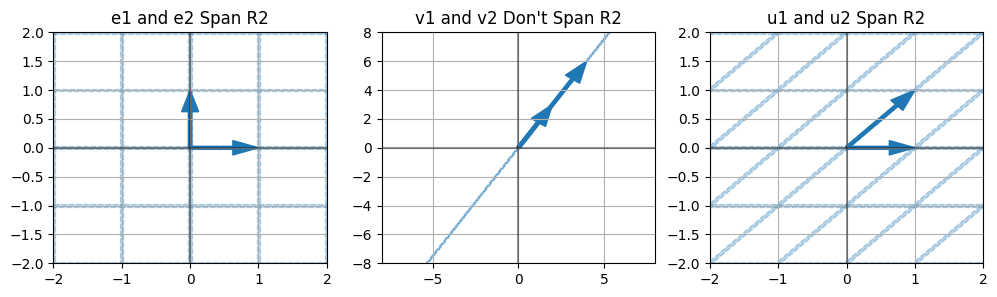

In [16]:
#@title
e1 = np.array([1, 0])
e2 = np.array([0, 1])
v1 = np.array([2, 3])
v2 = np.array([4, 6])
u1 = np.array([1, 0])
u2 = np.array([1, 1])

plt.figure(figsize = (12, 3))

plt.subplot(1, 3, 1)
plt.grid()
plt.axvline(x = 0, color = "black", alpha = 0.4)
plt.axhline(y = 0, color = "black", alpha = 0.4)
plt.arrow(0, 0, e1[0], e1[1], length_includes_head = True, width = 0.05, head_width = 0.25, color = "C0")
plt.arrow(0, 0, e2[0], e2[1], length_includes_head = True, width = 0.05, head_width = 0.25, color = "C0")

for i in range(-2, 3):
  for j in range(-2, 3):
    plt.arrow(i, j, e1[0], e1[1], length_includes_head = True, width = 0.05, head_width = 0, color = "C0", ls = "--", alpha = 0.3)
    plt.arrow(i, j, e2[0], e2[1], length_includes_head = True, width = 0.05, head_width = 0, color = "C0", ls = "--", alpha = 0.3)

plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.title("e1 and e2 Span R2")

plt.subplot(1, 3, 2)
plt.arrow(0, 0, v1[0], v1[1], length_includes_head = True, width = 0.2, head_width = 1, color = "C0")
plt.arrow(0, 0, v2[0], v2[1], length_includes_head = True, width = 0.2, head_width = 1, color = "C0")
plt.grid()
plt.axvline(x = 0, color = "black", alpha = 0.4)
plt.axhline(y = 0, color = "black", alpha = 0.4)

for i in range(-7, 8):
  plt.arrow(2*i, 3*i, v1[0], v1[1], length_includes_head = True, width = 0.1, head_width = 0.1, color = "C0", ls = "--", alpha = 0.3)
  plt.arrow(4*i, 6*i, v2[0], v2[1], length_includes_head = True, width = 0.1, head_width = 0.1, color = "C0", ls = "--", alpha = 0.2)

plt.xlim((-8, 8))
plt.ylim((-8, 8))
plt.title("v1 and v2 Don't Span R2")

plt.subplot(1, 3, 3)
plt.grid()
plt.axvline(x = 0, color = "black", alpha = 0.4)
plt.axhline(y = 0, color = "black", alpha = 0.4)
plt.arrow(0, 0, u1[0], u1[1], length_includes_head = True, width = 0.05, head_width = 0.25, color = "C0")
plt.arrow(0, 0, u2[0], u2[1], length_includes_head = True, width = 0.05, head_width = 0.25, color = "C0")

for i in range(-2, 3):
  for j in range(-2, 3):
    plt.arrow(i, j, u1[0], u1[1], length_includes_head = True, width = 0.05, head_width = 0, color = "C0", ls = "--", alpha = 0.3)
    plt.arrow(i, j, u2[0], u2[1], length_includes_head = True, width = 0.05, head_width = 0, color = "C0", ls = "--", alpha = 0.3)

plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.title("u1 and u2 Span R2")

plt.show()

Below is an interactive version of the plots above that allows you to choose a pair of vectors in $\mathbb{R}^2$ and visualize whether or not they *span* that space.

In [21]:
# @title
def plot_vectors(v1_x, v1_y, v2_x, v2_y):
    v1 = np.array([v1_x, v1_y])
    v2 = np.array([v2_x, v2_y])

    origin = np.array([[0, 0], [0, 0]])  # origin point

    # Clear and create plot
    plt.figure(figsize=(6, 6))

    for i in range(-10, 10):
        for j in range(-10, 10):
            base = i * v1 + j * v2
            plt.arrow(base[0], base[1], v1[0], v1[1],
                      length_includes_head=True, width=0.01, head_width=0,
                      color="C0", ls="--", alpha=0.3)
            plt.arrow(base[0], base[1], v2[0], v2[1],
                      length_includes_head=True, width=0.01, head_width=0,
                      color="C0", ls="--", alpha=0.3)

    plt.quiver(*origin, [v1[0], v2[0]], [v1[1], v2[1]], angles='xy', scale_units='xy', scale=1, color=['r','b'])
    plt.xlim(-4*max(abs(v1[0]), abs(v2[0]), 1.5), 4*max(abs(v1[0]), abs(v2[0]), 1.5))
    plt.ylim(-4*max(abs(v1[1]), abs(v2[1]), 1.5), 4*max(abs(v1[1]), abs(v2[1]), 1.5))
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.title(r"Do your vectors span $\mathbb{R}^2$")
    plt.show()

# Create sliders for vector components
interact(plot_vectors,
         v1_x=FloatText(min=-10, max=10, value=1, description='v1[0]'),
         v1_y=FloatText(min=-10, max=10, value=0, description='v1[1]'),
         v2_x=FloatText(min=-10, max=10, value=0, description='v2[0]'),
         v2_y=FloatText(min=-10, max=10, value=1, description='v2[1]'))

interactive(children=(FloatText(value=1.0, description='v1[0]'), FloatText(value=0.0, description='v1[1]'), Fl…

<function __main__.plot_vectors(v1_x, v1_y, v2_x, v2_y)>

### When is it that a Collection of Vectors from $\mathbb{R}^n$ Spans $\mathbb{R}^n$?

We've done several visual explorations above and have noted that sometimes two vectors from $\mathbb{R}^2$ are able to *span* $\mathbb{R}^2$, but other times they are not able to span the space. That is, there are some vectors (locations in $\mathbb{R}^2$ which cannot be reached using steps only in the directions of the two vectors being investigated). So, when do two vectors from $\mathbb{R}^2$ actually *span* all of $\mathbb{R}^2$? More generally, when does a collection of vectors from $\mathbb{R}^m$ *span* all of $\mathbb{R}^m$?

**Equivalent Statements:** The following statements are equivalent.

1. The collection of vectors $\left\{\vec{v_1}, \vec{v_2}, \cdots, \vec{v_p}\right\}$ spans $\mathbb{R}^m$.
2. The vector equation $x_1\vec{v_1} + x_2\vec{v_2} + \cdots + x_p\vec{v_p} = \vec{b}$ has a solution for every $\vec{b} \in\mathbb{R}^m$.
2. The matrix equation $\begin{bmatrix} \vec{v_1} & \vec{v_2} & \cdots & \vec{v_p}\end{bmatrix}\vec{x} = \vec{b}$ has a solution for every $\vec{b}\in\mathbb{R}^m$.
3. The matrix $\begin{bmatrix} \vec{v_1} & \vec{v_2} & \cdots & \vec{v_p}\end{bmatrix}$ has a pivot in every row, making it impossible for the augmented matrix $\begin{bmatrix} \vec{v_1} & \vec{v_2} & \cdots & \vec{v_p} & | & \vec{b}\end{bmatrix}$ to have a pivot in its rightmost column.
4. The linear system $\left\{\begin{array}{rcr} a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n & = & b_1\\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n & = & b_2\\
 & \vdots & \\
a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n & = & b_n\end{array}\right.$ is consistent for all choices of $b_1,~b_2,~\cdots,~b_n$.

> **Example:** Determine whether the collection of vectors $\left\{\begin{bmatrix} 1\\ 0\\ -1\end{bmatrix}, \begin{bmatrix} 5\\ -2\\ 8\end{bmatrix}, \begin{bmatrix} 7\\ -2\\ 6\end{bmatrix}, \begin{bmatrix} 1\\ 1\\ -1\end{bmatrix}\right\}$ spans $\mathbb{R}^3$

#### Describing the Space Spanned by a Collection of Vectors

Even if a collection of vectors $\left\{\vec{v_1},~\vec{v_2},~\cdots,~\vec{v_p}\right\}$ does *not* span all of $\mathbb{R}^m$, it is possible to describe the subset of $\mathbb{R}^m$ that *is* spanned by the collection. In order to do this, we simply solve the matrix equation $\begin{bmatrix} \vec{v_1} & \vec{v_2} & \cdots & \vec{v_p}\end{bmatrix} \vec{x} = \vec{b}$ for an arbitrary $\vec{b}\in \mathbb{R}^m$. That is, we row-reduce the following augmented matrix

$$\left[\begin{array}{cccc|c} v_{11} & v_{12} & \cdots & v_{1p} & b_1\\
v_{12} & v_{22} & \cdots & v_{2p} & b_2\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
v_{1m} & v_{m2} & \cdots & v_{mp} & b_m\end{array}\right]$$

and then ensure that the rightmost column does *not* contain a pivot. Identifying those requirements will shed light on the vectors $\vec{b}\in\mathbb{R}^m$ which are spanned by $\left\{\vec{v_1},~\vec{v_2},~\cdots,~\vec{v_p}\right\}$

> **Example:** Describe $\text{span}\left(\left\{\begin{bmatrix} 1\\ 0\\ -1\end{bmatrix}, \begin{bmatrix} 5\\ -2\\ 8\end{bmatrix}, \begin{bmatrix} 7\\ -2\\ 6\end{bmatrix}\right\}\right)$
>
>> *Solution.*
>>
>> \begin{align} \left[\begin{array}{ccc|c} 1 & 5 & 7 & b_1\\
0 & -2 & -2 & b_2\\
-1 & 8 & 6 & b_3\end{array}\right] &\stackrel{R_3 \leftarrow R_3 + R_1}{\longrightarrow} \left[\begin{array}{ccc|c} 1 & 5 & 7 & b_1\\
0 & -2 & -2 & b_2\\
0 & 13 & 13 & b_1 + b_3\end{array}\right]\\
&\stackrel{R_2 \leftarrow \frac{-1}{2}R_2}{\longrightarrow} \left[\begin{array}{ccc|c} 1 & 5 & 7 & b_1\\
0 & 1 & 1 & \frac{-b_2}{2}\\
0 & 13 & 13 & b_1 + b_3\end{array}\right]\\
&\stackrel{R_3 \leftarrow R_3 + (-13)R_2}{\longrightarrow} \left[\begin{array}{ccc|c} 1 & 5 & 7 & b_1\\
0 & 1 & 1 & \frac{-b_2}{2}\\
0 & 0 & 0 & b_1 + b_3 + \frac{13b_2}{2}\end{array}\right]\\
&\stackrel{R_1 \leftarrow R_1 + (-5)R_2}{\longrightarrow} \left[\begin{array}{ccc|c} 1 & 0 & 2 & b_1 + \frac{5b_2}{2}\\
0 & 1 & 1 & \frac{-b_2}{2}\\
0 & 0 & 0 & b_1 + b_3 + \frac{13b_2}{2}\end{array}\right]
\end{align}
>>
>> From here, we see that there is a pivot in the rightmost column of the augmented coefficient matrix unless $b_1 + b_3 + \frac{13b_2}{2} = 0$. The system is consistent as long as this equality holds -- that is, there is a solution for any vector $\vec{b} = \begin{bmatrix} b_1\\ b_2\\ b_3\end{bmatrix}$ in $\mathbb{R}^3$ as long as $b_1 + b_2 + \frac{13}{2}b_3 = 0$. This restriction defines a plane in $\mathbb{R}^3$.

***
**Examples:** Complete the following examples.

1. Determine what geometric object is spanned by the vectors $\vec{v_1} = \begin{bmatrix} 1\\ 2\end{bmatrix}$ and $\vec{v_2} = \begin{bmatrix} 2\\ 4\end{bmatrix}$.

2. Is the vector $\vec{b} = \begin{bmatrix} 2\\ 1\\ 9\end{bmatrix}$ in the *span* of the vectors $\vec{v_1} = \begin{bmatrix} 1\\ 0\\ 2\end{bmatrix}$ and $\vec{v_2} = \begin{bmatrix} -1\\ 1\\ 3\end{bmatrix}$?

3. Can the set of vectors $\left\{\begin{bmatrix} 1\\ 0\\ 0\\ 0\end{bmatrix}, \begin{bmatrix} 0\\ 1\\ 0\\ 0\end{bmatrix}, \begin{bmatrix} 1\\ 1\\ 1\\ 1\end{bmatrix}\right\}$ span all of $\mathbb{R}^4? Why or why not?

4. Determine the span of the vectors $\vec{v_1} = \begin{bmatrix} 1\\ 1\end{bmatrix}$ and $\vec{v_2} = \begin{bmatrix} -1\\ 2\end{bmatrix}$. Would the span change if we included a third vector $\vec{v_3} = \begin{bmatrix} 2\\ 3\end{bmatrix}$? Why or why not?